In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [2]:
df = pd.read_csv('Market_listings.csv')

In [3]:
plt.style.use('fivethirtyeight')

c:\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

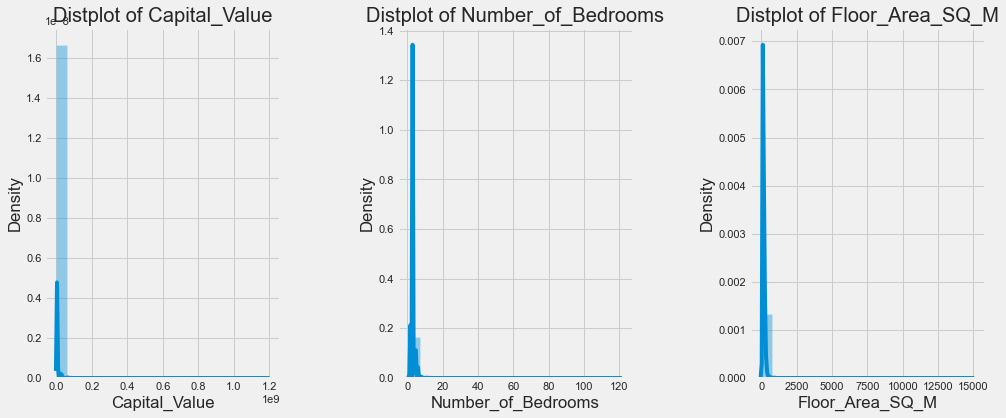

In [4]:
#Histogram
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Capital_Value' , 'Number_of_Bedrooms' , 'Floor_Area_SQ_M']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [6]:
df = df.loc[ 
                    (df['Number_of_Bedrooms'] <= 10)
                     ]

c:\Python\Python37\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Python\Python37\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


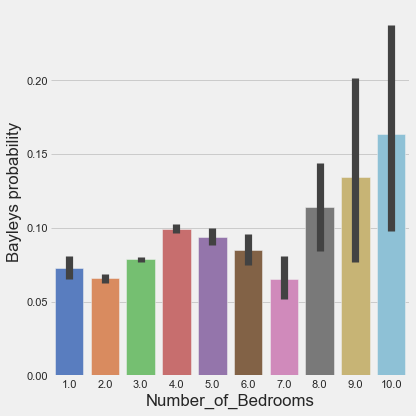

In [7]:
# Explore bedroom feature vs Bayleys
g = sns.factorplot(x="Number_of_Bedrooms",y="Bayleys",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Bayleys probability")

In [9]:
df = df.loc[ 
                    (df['Number_of_Bathrooms'] <= 10)
                     ]

c:\Python\Python37\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Python\Python37\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


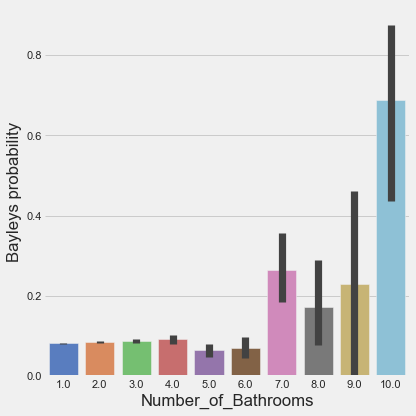

In [10]:
# Explore bathroom feature vs Bayleys
g = sns.factorplot(x="Number_of_Bathrooms",y="Bayleys",data=df,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Bayleys probability")

In [12]:
df = df.loc[ 
                    (df['Capital_Value'] >= 100000) &
                    (df['Capital_Value'] <= 1000000)
                     ]

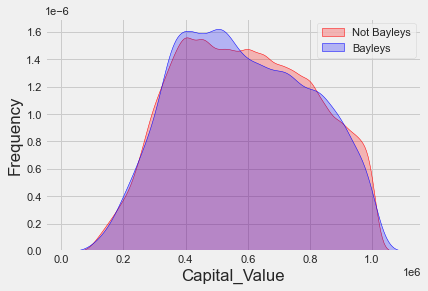

In [13]:
# Explore capital value distibution 
g = sns.kdeplot(df["Capital_Value"][(df["Bayleys"] == 0) & (df["Capital_Value"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Capital_Value"][(df["Bayleys"] == 1) & (df["Capital_Value"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Capital_Value")
g.set_ylabel("Frequency")
g = g.legend(["Not Bayleys","Bayleys"])

In [19]:
df = df.loc[ 
                    (df['Floor_Area_SQ_M'] <= 400)
                     ]

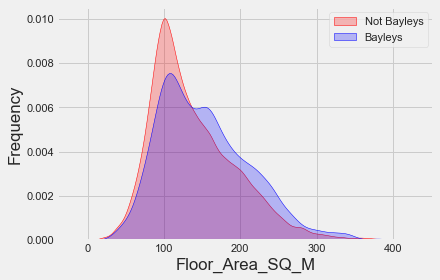

In [20]:
# Explore floor area distibution 
g = sns.kdeplot(df["Floor_Area_SQ_M"][(df["Bayleys"] == 0) & (df["Floor_Area_SQ_M"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Floor_Area_SQ_M"][(df["Bayleys"] == 1) & (df["Floor_Area_SQ_M"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Floor_Area_SQ_M")
g.set_ylabel("Frequency")
g = g.legend(["Not Bayleys","Bayleys"])

In [32]:
df = df.loc[ 
                    (df['Land_Area'] <= 2500)
                     ]

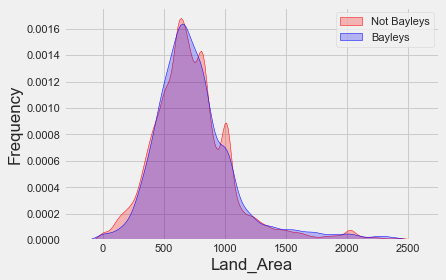

In [33]:
# Explore land area distibution 
g = sns.kdeplot(df["Land_Area"][(df["Bayleys"] == 0) & (df["Land_Area"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Land_Area"][(df["Bayleys"] == 1) & (df["Land_Area"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Land_Area")
g.set_ylabel("Frequency")
g = g.legend(["Not Bayleys","Bayleys"])